<a href="https://colab.research.google.com/github/2303A51923/PDS/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = {
    "OrderID": [101, 102, 103, 104, 105, 106, 107],
    "Product": ["Laptop", "Mobile", "Tablet", "Laptop", "Headphones", "Mobile", "Laptop"],
    "Quantity": [2, 5, 3, 1, 10, 2, 4],
    "Price": [50000, 15000, 12000, 52000, 2000, 15500, 49000]
}

df = pd.DataFrame(data)
print("Initial DataFrame:")
print(df)

df["Total_Sale"] = df["Quantity"] * df["Price"]
print("\nDataFrame with Total Sale:")
print(df)

filtered_df = df[df["Total_Sale"] > 1000]
print("\nOrders with Total Sale > 1000:")
print(filtered_df)

product_sales = df.groupby("Product")["Quantity"].sum().reset_index()
most_sold = product_sales.loc[product_sales["Quantity"].idxmax()]
print("\nMost Sold Product:")
print(most_sold)

def discount_func(sale):
    if sale > 50000:
        return 0.10 * sale
    elif sale > 20000:
        return 0.05 * sale
    else:
        return 0.02 * sale

df["Discount"] = df["Total_Sale"].apply(discount_func)
print("\nDataFrame with Discount Column:")
print(df)

output_file = "Ecommerce_Sales_Summary.xlsx"
df.to_excel(output_file, index=False)
print(f"\n✅ Data exported to {output_file}")


Initial DataFrame:
   OrderID     Product  Quantity  Price
0      101      Laptop         2  50000
1      102      Mobile         5  15000
2      103      Tablet         3  12000
3      104      Laptop         1  52000
4      105  Headphones        10   2000
5      106      Mobile         2  15500
6      107      Laptop         4  49000

DataFrame with Total Sale:
   OrderID     Product  Quantity  Price  Total_Sale
0      101      Laptop         2  50000      100000
1      102      Mobile         5  15000       75000
2      103      Tablet         3  12000       36000
3      104      Laptop         1  52000       52000
4      105  Headphones        10   2000       20000
5      106      Mobile         2  15500       31000
6      107      Laptop         4  49000      196000

Orders with Total Sale > 1000:
   OrderID     Product  Quantity  Price  Total_Sale
0      101      Laptop         2  50000      100000
1      102      Mobile         5  15000       75000
2      103      Tablet       

Department Budget DataFrame:
   Department  Budget
0          HR  200000
1          IT  500000
2     Finance  300000
3   Marketing  250000
4       Sales  400000
5  Operations  350000

Department Actual Expenses DataFrame:
   Department  Actual_Expenses
0          HR           210000
1          IT           480000
2     Finance           320000
3   Marketing           260000
4       Sales           420000
5  Operations           330000

Merged DataFrame:
   Department  Budget  Actual_Expenses
0          HR  200000           210000
1          IT  500000           480000
2     Finance  300000           320000
3   Marketing  250000           260000
4       Sales  400000           420000
5  Operations  350000           330000

DataFrame with Variance:
   Department  Budget  Actual_Expenses  Variance
0          HR  200000           210000    -10000
1          IT  500000           480000     20000
2     Finance  300000           320000    -20000
3   Marketing  250000           260000    -1000

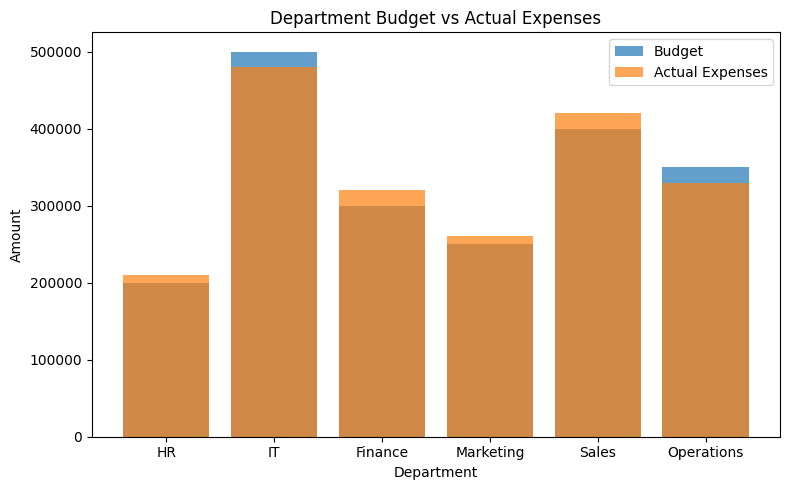

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
budget_data = {
    "Department": ["HR", "IT", "Finance", "Marketing", "Sales", "Operations"],
    "Budget": [200000, 500000, 300000, 250000, 400000, 350000]
}
df_budget = pd.DataFrame(budget_data)
print("Department Budget DataFrame:")
print(df_budget)

expense_data = {
    "Department": ["HR", "IT", "Finance", "Marketing", "Sales", "Operations"],
    "Actual_Expenses": [210000, 480000, 320000, 260000, 420000, 330000]
}
df_expenses = pd.DataFrame(expense_data)
print("\nDepartment Actual Expenses DataFrame:")
print(df_expenses)

df_merged = pd.merge(df_budget, df_expenses, on="Department")
print("\nMerged DataFrame:")
print(df_merged)

df_merged["Variance"] = df_merged["Budget"] - df_merged["Actual_Expenses"]
print("\nDataFrame with Variance:")
print(df_merged)

df_exceed = df_merged[df_merged["Variance"] < 0]
print("\nDepartments Exceeding Budget:")
print(df_exceed)

df_sorted = df_merged.sort_values(by="Variance")
print("\nDepartments Sorted by Variance:")
print(df_sorted)

plt.figure(figsize=(8,5))
plt.bar(df_merged["Department"], df_merged["Budget"], label="Budget", alpha=0.7)
plt.bar(df_merged["Department"], df_merged["Actual_Expenses"], label="Actual Expenses", alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Amount")
plt.title("Department Budget vs Actual Expenses")
plt.legend()
plt.tight_layout()
plt.show()
